In [1]:
import torch
import matplotlib.pyplot as plt

from dataset.hwp import Hwp
from dataset.utils import list_all_files
from tutorial_utils import make_hwp_text, Image2Text

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
save_path = "models/donut_nougat_aug"
image_to_text = Image2Text(save_path, device)

In [4]:
hwp = Hwp()
hwp.run_hwp()
hwp.page_set_up()
hwp.convert_multi_column()
hwp.convet_tap_pt(pt=200.0)

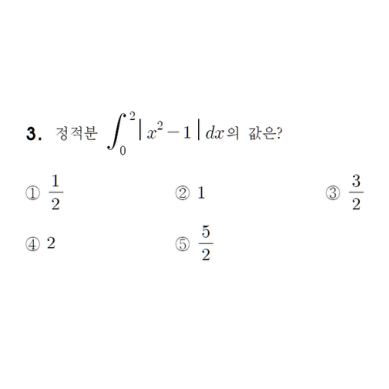

3. 정적분 $int_0 ^2 left| x^2 - 1 right| dx$의 값은?
① $1 over 2$
② $1$
③ $3 over 2$
④ $2$
⑤ $5 over 2$




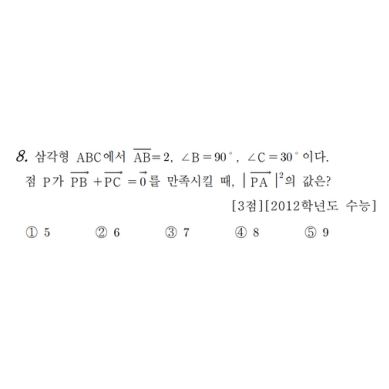

8. 삼각형 $rm ABC$에서 $bar{rmAB}=2$, $angle rmB=90DEG$, $angle rmC=30DEG$이다. 점 $rmP$가 $rm vec{PB} +vec{PC} = vec0$를 만족시킬 때, $rm {left| vec{PA } right|}^{2}$의 값은?
[2012학년도 수능]
① $5$② $6$③ $7$④ $8$⑤ $9$




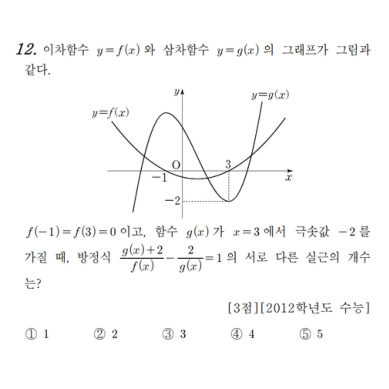

12. 이차함수 $y=f(x)$와 삼차함수 $y=g(x)$의 그래프가 그림과 같다.
[image]
$f(-1)=f(3)=0$이고, 함수 $g(x)$가 $x=3$에서 극솟값 $-2$를 가질 때, 방정식 ${g(x)+2} over f(x) - 2 over g(x) =1$의 서로 다른 실근의 개수는?
[3점][2012학년도 수능]
① $1$② $2$③ $3$④ $4$⑤ $5$




In [16]:
images_path = list_all_files('sample')

contents_list = []
for image_path in images_path:
    try:
        contents, image, seq = image_to_text.get_text(image_path, num_beams=4)
    except:
        continue
    
    if contents is None:
        continue

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    print('\n'.join(contents))
    print()
    print()

    make_hwp_text(hwp, contents)
    contents_list.append(contents)